# Загрузка данных

In [24]:
from random import random

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.svm import SVC, LinearSVC, NuSVC


from sklearn.metrics import f1_score, classification_report, confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier


from matplotlib import pyplot as plt
import pandas as pd


data = pd.read_csv('train.csv')
cols = data.columns
data_X = data[cols[0:-1]]
data_y = data[cols[-1]]
data_predict = pd.read_csv('test.csv')

# Убираем 5 столбец

data_X_no5col = data_X.drop(columns=['5'])
data_predict_no5col = data_predict.drop(columns=['5'])
kf_5 = KFold(n_splits=5, shuffle=True, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(data_X_no5col, data_y)

In [91]:
data_X

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-6.130724,7.429628,3.651437,-1.950971,-3.384415,1.095934,-3.077774,-2.619091,5.128201,1.228476,...,-0.565067,0.392978,4.920467,16.610460,-2.430804,-1.405573,18.610209,-4.140715,6.027816,-20.288145
1,5.161836,-6.514011,-7.474612,-4.544336,-13.081404,1.637562,-1.094672,-1.253545,-2.955342,-10.958200,...,3.433538,-4.840233,-0.514308,4.613289,2.391302,-4.795664,4.208278,-2.017168,-8.510424,10.806639
2,-2.971550,-21.508184,-1.125457,1.524129,3.027444,1.045879,1.551050,1.512075,-1.955564,3.683893,...,-1.659274,-0.385303,2.647917,-2.200556,1.058671,1.076312,-7.802389,-7.553953,0.636639,14.274950
3,6.724419,0.566489,0.509764,-4.524162,10.367236,2.083270,0.741790,-2.077787,-2.912744,-4.040637,...,3.270839,4.731346,15.378418,-14.031666,2.659410,5.123620,-8.500321,3.417960,-14.798490,-6.132800
4,-2.213659,-4.678213,-0.135845,2.375933,0.916649,1.027195,-0.353265,-0.220609,-3.416823,-5.964181,...,-10.292197,1.598330,-4.996614,4.504269,1.918961,-2.076223,0.154039,-2.016779,10.803205,5.942927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958,1.554111,2.018845,-2.550991,-2.049014,0.931923,1.329123,2.260598,0.907393,0.559868,-0.366525,...,17.651213,-2.078071,2.774934,-5.819371,-1.397282,0.629832,-1.098601,-7.498520,-7.752161,12.691050
6959,5.341612,-4.057497,0.712336,-0.529023,2.389152,1.048196,-4.248458,-2.516312,1.612912,0.088317,...,9.199936,-0.120301,-3.247273,-3.348203,2.651849,1.059434,-2.842064,-1.960203,-5.095832,-0.174943
6960,-2.348591,-8.263995,-0.318484,1.851011,-4.880470,1.392923,-4.348202,2.937274,-3.067852,-0.173702,...,-8.176217,0.819033,0.794195,9.353774,-1.841798,-1.116251,6.708149,-1.841971,5.747190,-7.608288
6961,5.481595,4.899412,-0.421851,4.639328,-20.671090,1.088426,-3.838050,0.622003,1.548813,-8.847505,...,-6.607413,1.697137,-8.315975,6.149865,1.437154,-7.284716,4.566744,-0.908937,11.555781,2.889093


In [92]:
data_y

0       0
1       0
2       0
3       1
4       0
       ..
6958    0
6959    0
6960    0
6961    0
6962    1
Name: target, Length: 6963, dtype: int64

# Простой классификатор

In [ ]:

def func(ar:list):
    res = []
    a1 = 1.6486205286342552
    a2 = 1.6469322124181416
    a = (a2 + a1) / 2
    for i in ar:
        if i < a:
            res.append(0)
        else:
            res.append(1)

    return res


res = func(data_predict['5'].to_numpy())

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

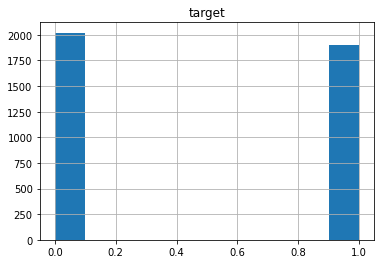

In [ ]:
df_output = pd.DataFrame({'target':res})
df_output.to_csv('a04_20220819.csv')
df_output.hist()
# score 0.4686192468619247

# Убираем столбец 5

In [32]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('logit', LogisticRegressionCV(cv=5, random_state=0, max_iter=200, n_jobs=-1, scoring='f1', solver='liblinear', penalty='l2', tol=1e-100))
    ])

pipe.fit(X_train, y_train)
est = pipe[-1]
est.scores_, est.coef_

({1: array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])},
 array([[-1.06861016e-05, -3.34356918e-03, -3.43420601e-03,
          4.20881148e-03,  1.82508504e-04,  1.79396565e-03,
          1.16158396e-03, -1.24492690e-04,  3.35428932e-03,
         -3.36185304e-03, -2.20616761e-03,  5.33578751e-03,
         -1.75876486e-03,  6.70607316e-04,  1.82419977e-03,
         -3.00167553e-05,  9.47088193e-03,  3.08422519e-03,
          2.65982206e-03,  6.18577548e-05,  2.49909451e-04,
          7.39782765e-03,  2.17229980e-03,  2.29857933e-03,
         -9.06295071e-04,  1.03614311e-03, -4.36397844e-03,
         -7.13069761e-03, -1.41205326e-03,  6.54399378e-03]]))

In [33]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('logit', )
    ])

pipe.fit(X_train, y_train)
est = pipe[-1]
est.scores_, est.coef_

ValueError: not enough values to unpack (expected 2, got 1)

Вывод - линеные моедели не работают

# Random Forest

In [40]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('logit', RandomForestClassifier())
    ])
cross_val_score(pipe, data_X_no5col, data_y, cv=kf_5)

pipe.fit(data_X_no5col, data_y)
y_p = pipe.predict(data_predict_no5col)
df_output = pd.DataFrame({'target': y_p})
df_output.to_csv('a06_20220819.csv')

In [49]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('logit', RandomForestClassifier())
    ])
cross_val_score(pipe, data_X_no5col, data_y, cv=kf_5, scoring='f1')

# pipe.fit(data_X_no5col, data_y)
# y_p = pipe.predict(data_predict_no5col)
# df_output = pd.DataFrame({'target': y_p})
# df_output.to_csv('a06_20220819.csv')

array([0.62105263, 0.63621533, 0.69011725, 0.6187291 , 0.63711002])

# KNN

score 0.81044957472661

без f1 метрики

In [38]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('logit', KNeighborsClassifier())
    ])

cross_val_score(pipe, data_X_no5col, data_y, cv=kf_5)


array([0.90236899, 0.89590811, 0.89949749, 0.90086207, 0.89655172])

если использовать метрику f1 получается такой score

In [47]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('logit', KNeighborsClassifier())
    ])

cross_val_score(pipe, data_X_no5col, data_y, cv=kf_5, scoring='f1')


array([0.80232558, 0.80325645, 0.79351032, 0.80285714, 0.79888268])

score 0.7095238095238096

Работае хуже, если добавить 5 колонку.

In [45]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('logit', KNeighborsClassifier())
    ])
print(cross_val_score(pipe, data_X, data_y, cv=kf_5))
pipe.fit(data_X, data_y)
y_p = pipe.predict(data_predict)
df_output = pd.DataFrame({'target': y_p})
df_output.to_csv('a05_202208192142_knn_all.csv')


[0.965542   0.96697775 0.97487437 0.95402299 0.96695402]


In [78]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('knn', KNeighborsClassifier(n_jobs=-1))
    ])

# pg = {'knn__n_neighbors':  [5, 6, 7], 'knn__weights': ['uniform', 'distance'], 'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'knn__p': list(range(1, 10))}
pg = {'knn__n_neighbors':  [5, 6, 7], 'knn__weights': ['uniform', 'distance'], 'knn__algorithm': ['ball_tree'], 'knn__p': list(range(1, 10))}

clf = RandomizedSearchCV(pipe, pg, cv=kf_5, scoring='f1', n_jobs=-1)
clf.fit(data_X_no5col, data_y)
clf.cv_results_

{'mean_fit_time': array([0.11102319, 0.10301795, 0.5286747 , 0.16458526, 0.37768359,
        0.20224528, 0.07004166, 0.12351232, 0.04581032, 0.49057384]),
 'std_fit_time': array([0.01543066, 0.01220151, 0.37991446, 0.16863836, 0.41550313,
        0.09599507, 0.0343508 , 0.04748631, 0.01784158, 0.27980449]),
 'mean_score_time': array([ 8.97944989,  8.93135748,  9.95971828, 10.41356635, 10.16842895,
         2.49429522,  1.60296955,  6.76866412,  3.03409004,  6.50767813]),
 'std_score_time': array([1.92554203, 1.83730624, 1.2442712 , 0.34006033, 0.96687142,
        1.0476537 , 0.33552655, 0.11849665, 0.26400812, 0.25115974]),
 'param_knn__weights': masked_array(data=['distance', 'distance', 'distance', 'uniform',
                    'distance', 'distance', 'uniform', 'uniform',
                    'distance', 'distance'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'par

# SGD

In [82]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('sgd', SGDClassifier(n_jobs=-1))
    ])
cross_val_score(pipe, data_X_no5col, data_y, cv=kf_5, scoring='f1')

array([0.08823529, 0.02830189, 0.12300683, 0.248     , 0.05140187])

# SVM


SVM 1

In [94]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('svm', SVC())
    ])
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1262
           1       0.95      0.83      0.89       479

    accuracy                           0.94      1741
   macro avg       0.95      0.91      0.93      1741
weighted avg       0.94      0.94      0.94      1741



In [95]:
cross_val_score(pipe, data_X_no5col, data_y, cv=kf_5, scoring='f1')

array([0.89466484, 0.89487179, 0.89042996, 0.87830688, 0.88801054])

In [102]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.708 total time=   0.8s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.709 total time=   0.8s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.709 total time=   0.8s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.709 total time=   0.8s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.709 total time=   0.8s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.581 total time=  36.1s


In [97]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.001)


In [98]:
grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1262
           1       0.91      0.85      0.88       479

    accuracy                           0.94      1741
   macro avg       0.93      0.91      0.92      1741
weighted avg       0.94      0.94      0.94      1741



In [99]:
cross_val_score(grid.best_estimator_, data_X_no5col, data_y)

array([0.93898062, 0.93682699, 0.93467337, 0.94396552, 0.93390805])

In [101]:
grid.best_estimator_.fit(data_X_no5col, data_y)

pipe.fit(data_X_no5col, data_y)
y_p = pipe.predict(data_predict_no5col)
df_output = pd.DataFrame({'target': y_p})
df_output.to_csv('a07_20220819_SVC.csv')
#scoring 0.9104143337066068 

SVM 2

In [3]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('svc', SVC(random_state=0))
    ])
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)
print(classification_report(y_test, predictions))
cvs = cross_val_score(pipe, X_train, y_train, scoring='f1')
print(cvs, cvs.mean())
pipe.get_params()

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1258
           1       0.95      0.83      0.89       483

    accuracy                           0.94      1741
   macro avg       0.95      0.91      0.92      1741
weighted avg       0.94      0.94      0.94      1741

[0.88028169 0.86759582 0.90812721 0.88571429 0.86486486] 0.8813167736031783


{'memory': None,
 'steps': [('scaller', StandardScaler()), ('svc', SVC(random_state=0))],
 'verbose': False,
 'scaller': StandardScaler(),
 'svc': SVC(random_state=0),
 'scaller__copy': True,
 'scaller__with_mean': True,
 'scaller__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': 0,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [6]:
param_grid = {'svc__C': [0.1, 1, 10, 100, 1000],
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__kernel': ['rbf', 'poly', 'sigmoid']}
 
grid = GridSearchCV(pipe, param_grid, refit = True, verbose = 4, scoring='f1')
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.000 total time=   1.9s
[CV 2/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.000 total time=   1.7s
[CV 3/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.000 total time=   1.1s
[CV 4/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.000 total time=   1.3s
[CV 5/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.000 total time=   1.5s
[CV 1/5] END svc__C=0.1, svc__gamma=1, svc__kernel=poly;, score=0.359 total time=  11.9s
[CV 2/5] END svc__C=0.1, svc__gamma=1, svc__kernel=poly;, score=0.332 total time=  12.3s
[CV 3/5] END svc__C=0.1, svc__gamma=1, svc__kernel=poly;, score=0.329 total time=  14.1s
[CV 4/5] END svc__C=0.1, svc__gamma=1, svc__kernel=poly;, score=0.378 total time=  11.3s
[CV 5/5] END svc__C=0.1, svc__gamma=1, svc__kernel=poly;, score=0.367 total time=  11.5s
[CV 1/5] END svc__C=0.1, svc__gamma=1, svc__kernel=si

GridSearchCV(estimator=Pipeline(steps=[('scaller', StandardScaler()),
                                       ('svc', SVC(random_state=0))]),
             param_grid={'svc__C': [0.1, 1, 10, 100, 1000],
                         'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svc__kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='f1', verbose=4)

In [9]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))
csv = cross_val_score(grid.best_estimator_, data_X_no5col, data_y)
print(cvs, cvs.mean())

{'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Pipeline(steps=[('scaller', StandardScaler()),
                ('svc', SVC(C=100, gamma=0.01, random_state=0))])
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1258
           1       0.90      0.86      0.88       483

    accuracy                           0.94      1741
   macro avg       0.93      0.91      0.92      1741
weighted avg       0.93      0.94      0.93      1741

[0.88028169 0.86759582 0.90812721 0.88571429 0.86486486] 0.8813167736031783


In [10]:
grid.best_estimator_.fit(data_X_no5col, data_y)

pipe.fit(data_X_no5col, data_y)
y_p = pipe.predict(data_predict_no5col)
df_output = pd.DataFrame({'target': y_p})
df_output.to_csv('a07_20220819_SVC2.csv')
#scoring 0.9104143337066068 